In [1]:
import pandas as pd
import numpy as np

df_X = pd.read_csv('matminer_feature.csv')
df_X = df_X.drop(['Unnamed: 0'],axis=1)
x = df_X.values

from sklearn.impute import SimpleImputer

X =  SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(x)

df_y = pd.read_csv('y.csv')
df_y = df_y.drop(['Unnamed: 0'],axis=1)
y = df_y.values

X.shape,y.shape

((3017, 15), (3017, 1))

In [2]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
    
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [8]:
y_pred = lg.predict(X_test)
y_predprob = lg.predict_proba(X_test)[:,1]

from sklearn import metrics

print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.8162
AUC Score (Train): 0.756424


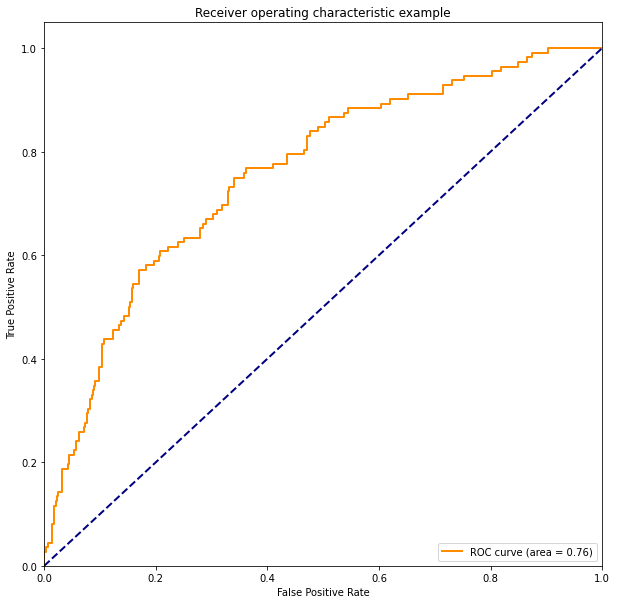

In [9]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predprob)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot  as plt

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_test = {'penalty': ['l1','l2']}
gsearch = GridSearchCV(estimator =LogisticRegression(random_state=0),param_grid = param_test,scoring='roc_auc',cv=5)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

({'penalty': 'l2'}, 0.7751286967226935)

In [12]:
param_test1 = {'solver': ['newton_cg','lbfgs','liblinear','sag','saga']}
gsearch1 = GridSearchCV(estimator =LogisticRegression(random_state=0),param_grid = param_test1,scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

({'solver': 'liblinear'}, 0.7753022118585257)

In [15]:
param_test2 = {'C': [0,0.2,0.4,0.6,0.8,1,2,5,7,10]}
gsearch2 = GridSearchCV(estimator =LogisticRegression(random_state=0),param_grid = param_test2,scoring='roc_auc',cv=5)
gsearch2.fit(X,y)
gsearch2.best_params_, gsearch2.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

({'C': 10}, 0.7779217243596529)